In [13]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 

#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

In [14]:
#Read the data
df = pd.read_csv(r'C:\Users\perez\OneDrive\Documents\Portfolio\Project3\movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [15]:
# Drop null values 
df= df.dropna()

# Drop duplicates
df.drop_duplicates()

df.shape

(5421, 15)

In [16]:
# Column data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [17]:
#Get rid of decimal for budget, gross, and votes columns 
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [19]:
#Create a correct year column, so the release date and year match 
df['year_correct'] = df['released'].astype(str).str.split('(').str[-2].astype(str).str[-5:-1]
df['year_correct'] = df['year_correct'].astype('int64')
df.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
2476,Disclosure,R,Drama,1994,"December 9, 1994 (United States)",6.1,48000,Barry Levinson,Michael Crichton,Michael Douglas,United States,55000000,214015089,Warner Bros.,128.0,1994
3079,Midnight in the Garden of Good and Evil,R,Crime,1997,"November 21, 1997 (United States)",6.6,37000,Clint Eastwood,John Berendt,John Cusack,United States,35000000,25105255,Warner Bros.,155.0,1997
6574,Big Eyes,PG-13,Biography,2014,"December 25, 2014 (United States)",7.0,88000,Tim Burton,Scott Alexander,Amy Adams,United States,10000000,29253166,The Weinstein Company,106.0,2014
5702,Diary of a Wimpy Kid,PG,Animation,2010,"March 19, 2010 (United States)",6.2,45000,Thor Freudenthal,Jackie Filgo,Zachary Gordon,United States,15000000,76196538,Color Force,120.0,2010
2571,Cemetery Man,R,Comedy,1994,"April 26, 1996 (United States)",7.1,20000,Michele Soavi,Tiziano Sclavi,Rupert Everett,Italy,4000000,253986,Audifilm,105.0,1996


In [20]:
# Map categorical data
df_numerized = df.copy(deep=True)

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category')
       df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.sample(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
2878,3700,6,4,1996,1427,4.5,44000,70,401,429,47,40000000,113309743,370,115.0,1996
1654,3933,6,4,1990,556,5.6,22000,207,2071,1735,47,47000000,15691192,1426,125.0,1990
4146,4647,1,6,2002,1639,6.9,33000,976,2166,435,47,22000000,80693537,33,127.0,2002
6060,4558,5,6,2012,2173,7.9,475000,1803,2822,1100,47,13000000,33384127,1309,103.0,2012
6528,4879,6,4,2014,2423,6.6,75000,1771,1613,748,47,19800000,41296320,13,103.0,2014


In [21]:
#Find correlation 
corr=df_numerized.corr().round(2)
corr.unstack().sort_values().drop_duplicates()

genre         budget         -0.37
gross         genre          -0.24
rating        budget         -0.20
gross         rating         -0.18
votes         genre          -0.14
rating        company        -0.09
genre         company        -0.07
              runtime        -0.06
year_correct  director       -0.04
year          writer         -0.03
budget        star           -0.02
star          name           -0.01
director      released        0.00
              score           0.01
rating        year_correct    0.02
year          name            0.03
votes         country         0.04
score         released        0.05
              year_correct    0.06
budget        score           0.07
runtime       year            0.08
company       votes           0.12
runtime       rating          0.14
rating        genre           0.15
company       budget          0.17
year_correct  votes           0.20
votes         year            0.21
score         gross           0.22
writer        direct

Text(0.5, 1.0, 'Correlation Matrix')

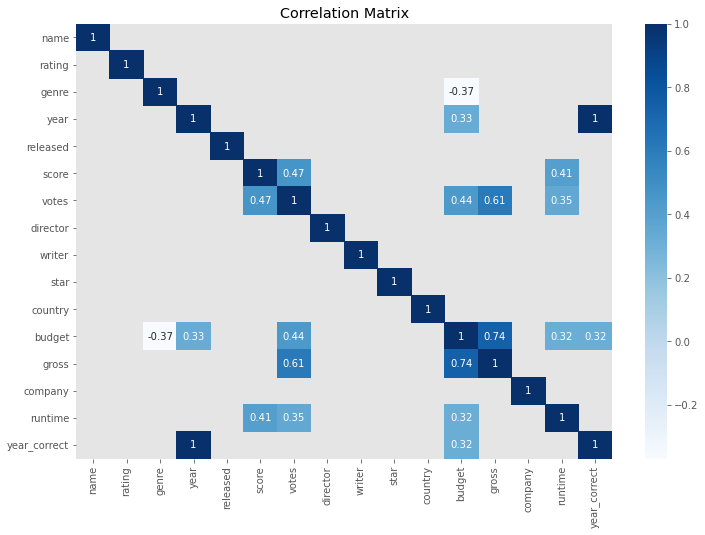

In [22]:
# Visualize correlation 
moderate_corr = corr[((corr>=.3) | (corr<= -.3))] 
plt.figure(figsize=(12,8))
sns.heatmap(moderate_corr,annot=True, cmap="Blues")
plt.title('Correlation Matrix')

Text(0, 0.5, 'Gross Income')

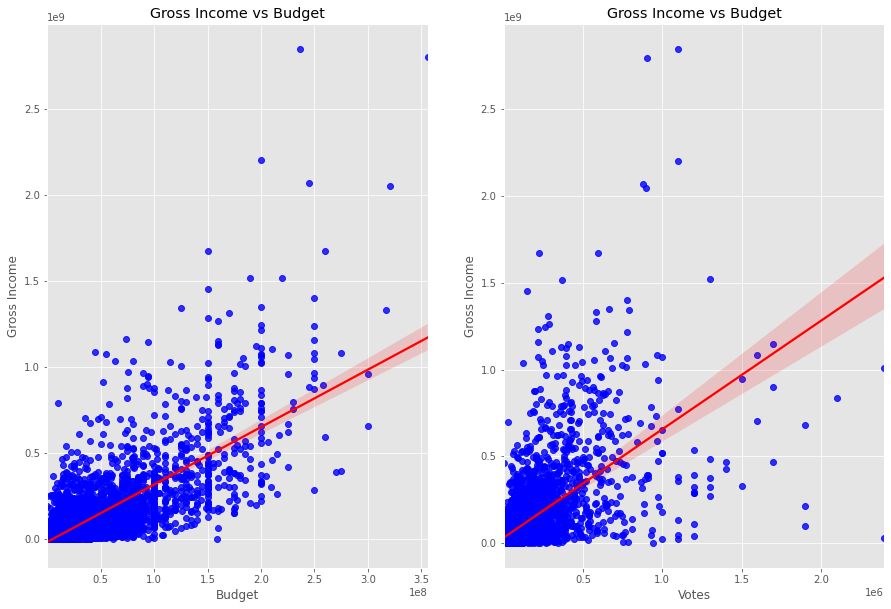

In [11]:
#set the size of overall figure
fig = plt.figure(figsize=(15,10))

# Budget Vs Gross Income with regression line 
plt.subplot(1,2,1)
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color':'red'})
plt.title('Gross Income vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross Income')

# Votes Vs Gross Income with regression line
plt.subplot(1,2,2)
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color':'red'})
plt.title('Gross Income vs Budget')
plt.xlabel('Votes')
plt.ylabel('Gross Income')

<AxesSubplot:xlabel='genre', ylabel='gross'>

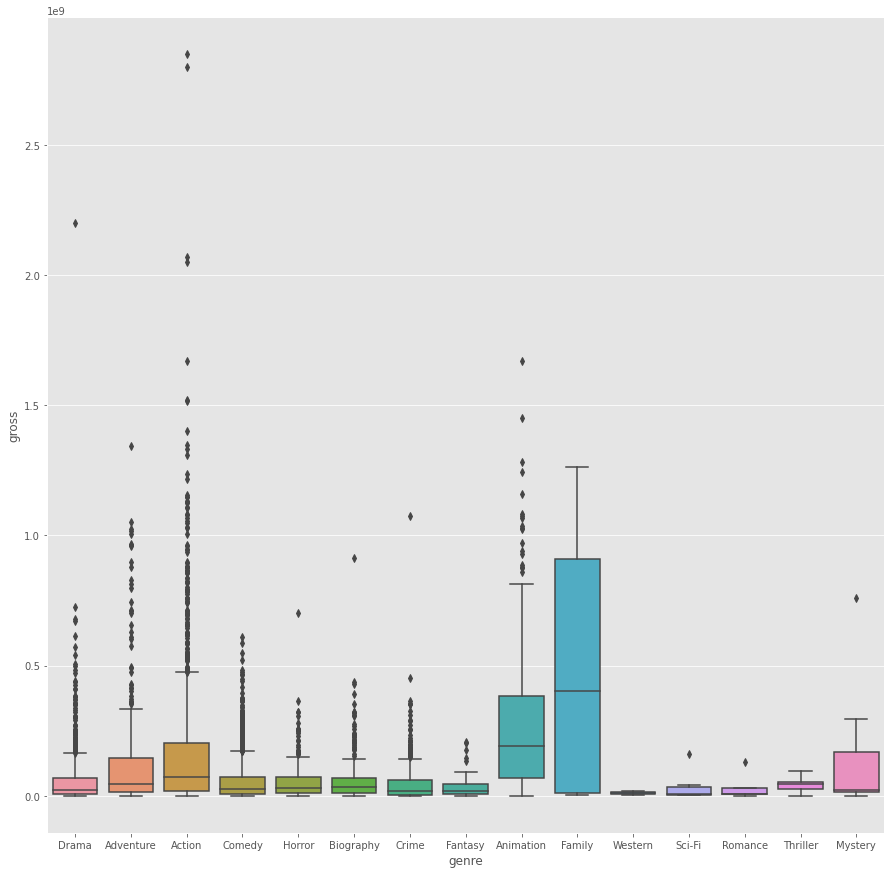

In [29]:
# How does gross income compare by genre? 
plt.subplots(figsize=(15,15))
sns.boxplot(x='genre', y='gross', data=df)

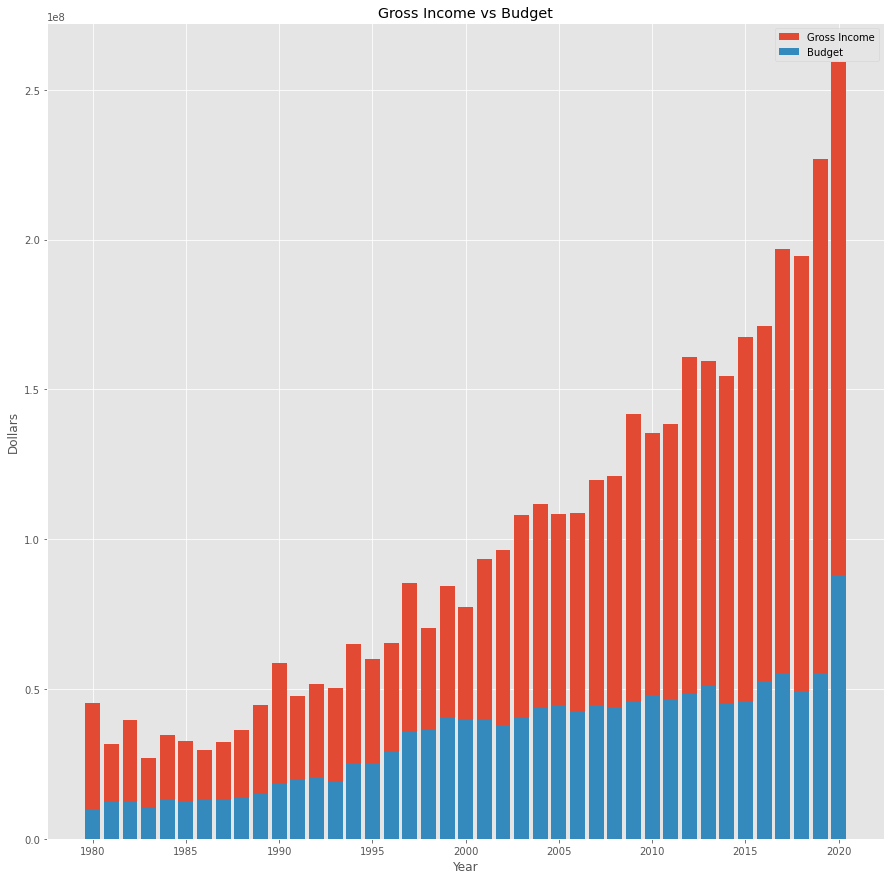

In [30]:
# Average gross income and budget per year
plt.subplots(figsize=(15,15))
yearly_mean= df.groupby('year_correct').mean().reset_index()

plt.bar(yearly_mean['year_correct'],yearly_mean['gross'], label='Gross Income')
plt.bar(yearly_mean['year_correct'],yearly_mean['budget'], label='Budget')
plt.title('Gross Income vs Budget')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend(loc='best')